In [49]:
# import numerical packages
import numpy as np
import pandas as pd

In [50]:
#import data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
#magic command to display plots in jupyter
%matplotlib inline

#### Initially, I copied a boston house price raw data from a git repository and saved it as a csv file, but it lacked additional characteristics to understand the dataset. I loaded a similar dataset instead from sklearn as shown below.

In [52]:
# load the dataset from scikit-learn library 
from sklearn.datasets import load_boston

In [53]:
boston = load_boston()

In [54]:
# check info axis of the object
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [55]:
# check the size and number of columns
boston.data.shape

(506, 13)

In [56]:
# print the column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [57]:
# read the descrition of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Build the dataframe using the boston data and place the feature names as the rows

In [58]:
bdf = pd.DataFrame(boston.data, columns=boston.feature_names)

In [59]:
# check the first 5 rows of the dataframe
bdf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


The 'medv' or usually the target, as described in DESCR is not included in the dataframe. It is the Median value of owner-occupied homes in $1000's.

In [60]:
# add the target 'medv' as Price column
bdf['Price'] = boston.target

In [61]:
# check for any missing data. isnull() gives back a boolean if there is missing information and sum willadd it all up. 
bdf.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [14]:
bdf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
bdf['CHAS'][1]

0.0

In [16]:
# get the summary statistics of the dataset
bdf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [18]:
# sns.pairplot(bdf)

The pairplot shows data plotted against each other. We can see correlation with our Price to LSTAT and RM. RAD and TAX appear to be correlated as well. 



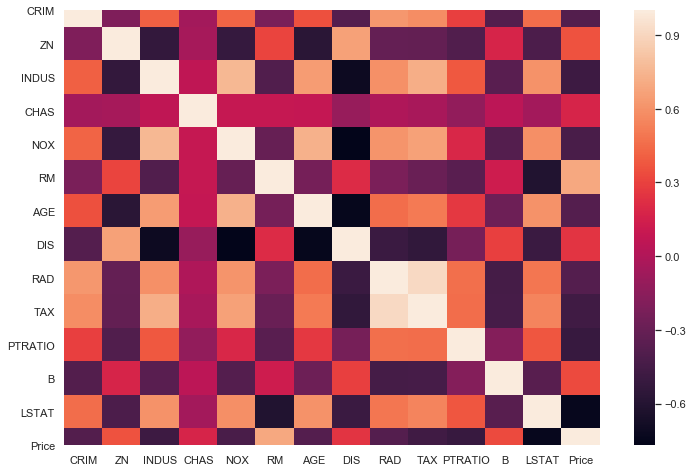

In [19]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(bdf.corr())

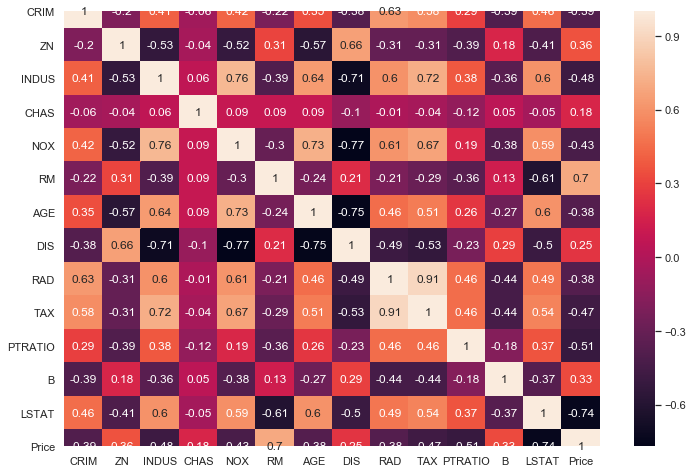

In [20]:
correlation_matrix=bdf.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
# annot=True prints the values inside the square
#values closer to 1 means a strong positive correlation
# values closer to -1 means a strong negative correlation

The heatmap appear to show a high correlation between the target variable of Price and two other variables, the percentage of lower status (LSTAT) 
and average number of rooms per dwelling (Rooms). 


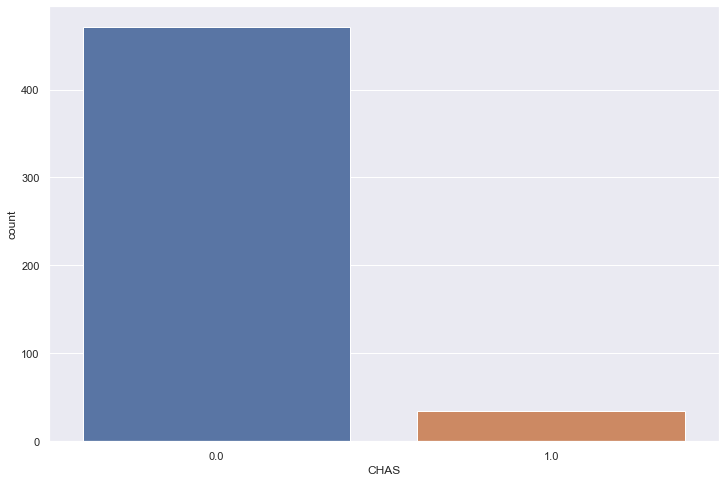

In [21]:
sns.countplot(x = 'CHAS', data = bdf)

CHAS variable in a countplot. Significant number of the houses do not tract the Charles river

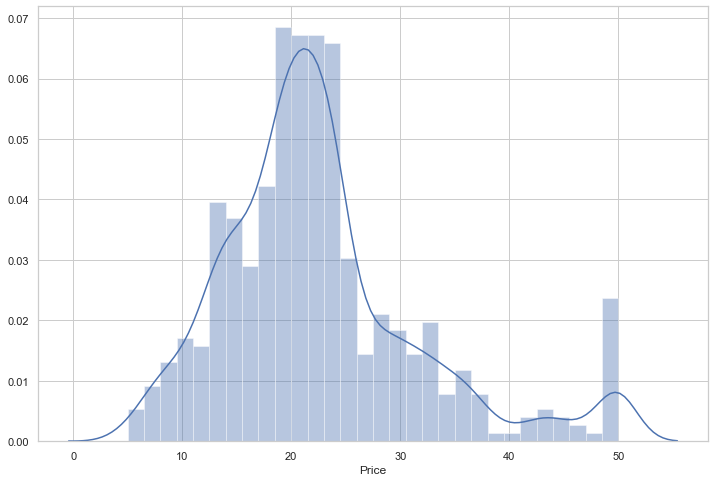

In [22]:
# plot the distribution of Price 
sns.set_style('whitegrid')
sns.distplot(bdf['Price'], bins = 30)

The median value or price of houses appear to follow a normal distribution. Some outliers in the 48-50 mark.

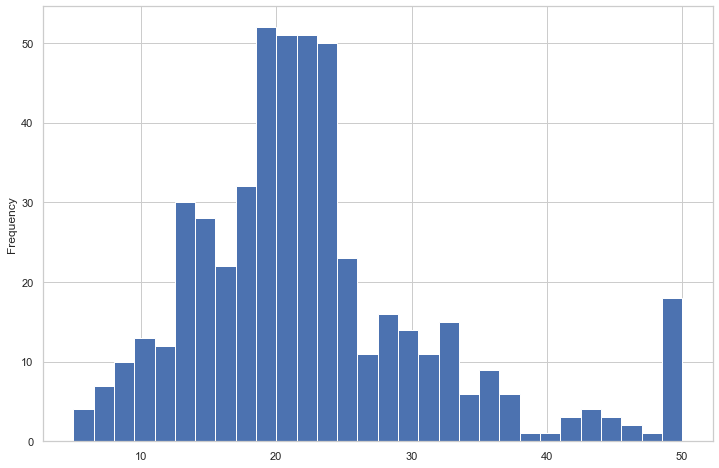

In [23]:
bdf['Price'].plot.hist(bins = 30)

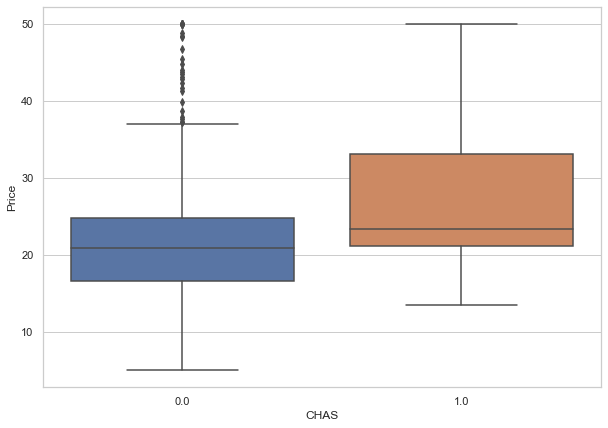

In [24]:
plt.figure(figsize = (10,7) )
sns.boxplot(x = 'CHAS', y= 'Price', data=bdf)

It seems like house prices that track Charles river have a higher average price than those that do not track the river.

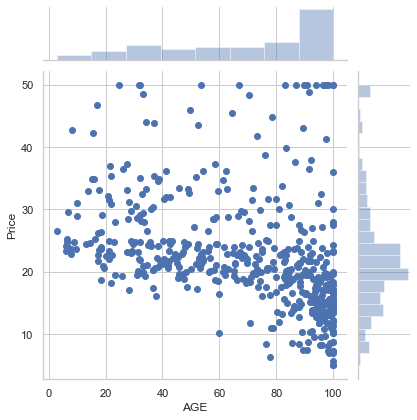

In [25]:
sns.jointplot(x = 'AGE', y = 'Price', data = bdf)

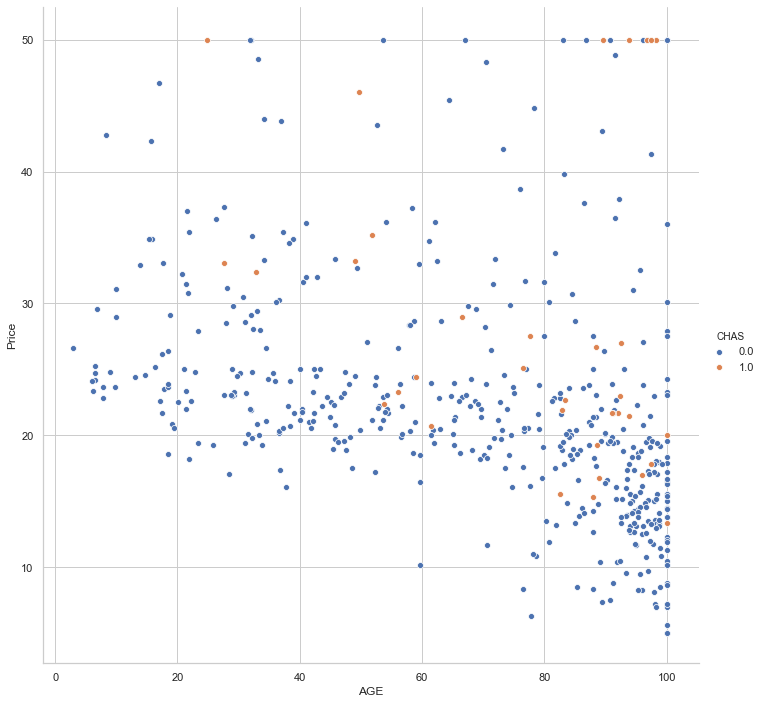

In [26]:
sns.pairplot(data= bdf, hue = 'CHAS',x_vars = 'AGE', y_vars = 'Price', height= 10, aspect = 1)

In [27]:
# sns.pairplot(bdf, hue = 'CHAS')

In [62]:
# slice the dataframe
nr = bdf[bdf['CHAS']== 0.0]
r = bdf[bdf['CHAS']== 1.0]

In [63]:
nr.count()

CRIM       471
ZN         471
INDUS      471
CHAS       471
NOX        471
RM         471
AGE        471
DIS        471
RAD        471
TAX        471
PTRATIO    471
B          471
LSTAT      471
Price      471
dtype: int64

In [64]:
r.count()

CRIM       35
ZN         35
INDUS      35
CHAS       35
NOX        35
RM         35
AGE        35
DIS        35
RAD        35
TAX        35
PTRATIO    35
B          35
LSTAT      35
Price      35
dtype: int64

In [31]:
nr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [65]:
# Don't know if this is needed
df1 = nr['Price']
df2 = r['Price']

In [66]:
# Don't know if this is needed
df3 = pd.concat([df1,df2])
river = ['near']*471 + ['away']*35
df4 = pd.DataFrame({'River Charles': river, 'price': df3})
df4

,River Charles,price
0,near,24.0
1,near,21.6
2,near,34.7
3,near,33.4
4,near,36.2
...,...,...
363,away,16.8
364,away,21.9
369,away,50.0
370,away,50.0


In [34]:
# Don't know if this is needed
df4[df4['River Charles']=='away']['price']

142    13.4
152    15.3
154    17.0
155    15.6
160    27.0
162    50.0
163    50.0
208    24.4
209    20.0
210    21.7
211    19.3
212    22.4
216    23.3
218    21.5
219    23.0
220    26.7
221    21.7
222    27.5
234    29.0
236    25.1
269    20.7
273    35.2
274    32.4
276    33.2
277    33.1
282    46.0
283    50.0
356    17.8
357    21.7
358    22.7
363    16.8
364    21.9
369    50.0
370    50.0
372    50.0
Name: price, dtype: float64

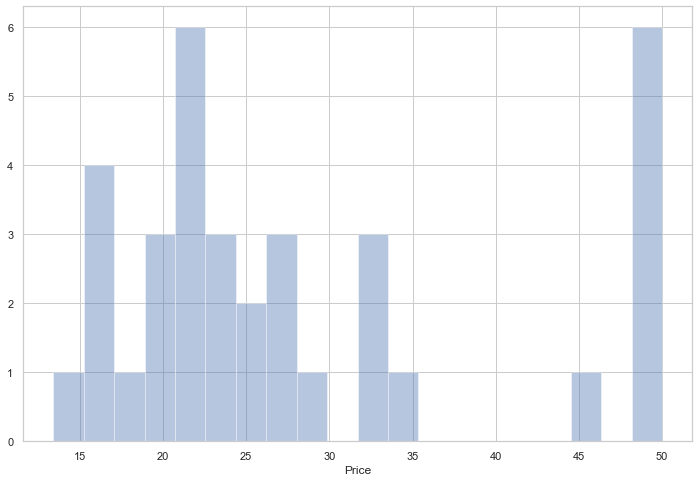

In [35]:
# histogram of house prices that track the river
sns.distplot(r['Price'],bins = 20, kde = False)

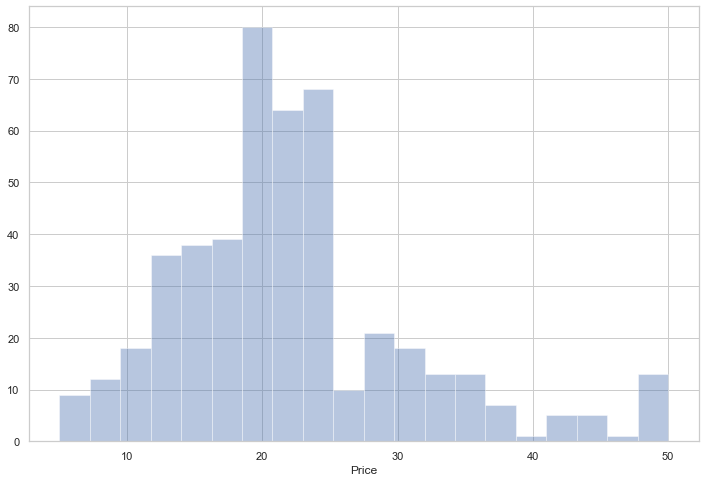

In [36]:
sns.distplot(nr['Price'], bins = 20, kde = False)

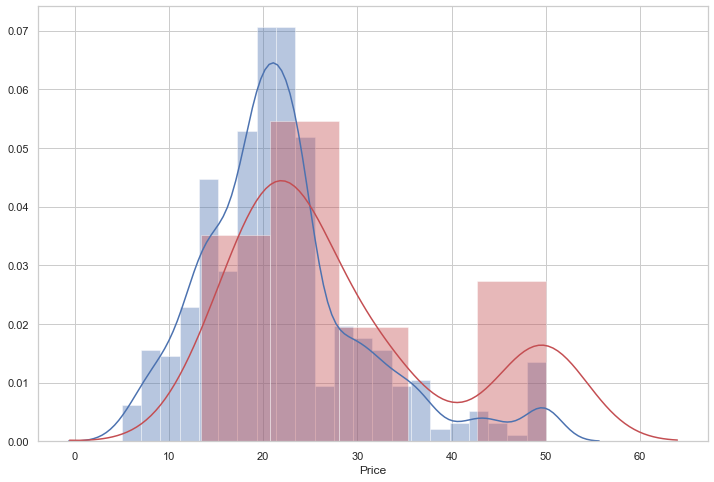

In [37]:
# Y axis shows density rather than count.
sns.distplot(nr['Price'])
sns.distplot(r['Price'], color = 'r' )

In [67]:
import scipy.stats as stats

In [68]:
print(stats.ttest_ind(nr['Price'], r['Price'] ))

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)


We get a very small pvalue lower that indicate that we reject the null hypothesis.

In [69]:
stats.f_oneway(nr['Price'], r['Price'])

F_onewayResult(statistic=15.971512420371955, pvalue=7.390623170520815e-05)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X = bdf[['Price','CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
 'B', 'LSTAT']]
y = bdf['CHAS']


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


C:\Users\James\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
predictions = logmodel.predict(X_test)

In [76]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       116
         1.0       1.00      0.82      0.90        11

    accuracy                           0.98       127
   macro avg       0.99      0.91      0.95       127
weighted avg       0.98      0.98      0.98       127

